## Project 5. Due Date: April 19 at 11:59 pm.

__Brief Honor Code.__ Do the project on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. Any solution taken from internet will receive zero.

---

## Question 1.

### Background

Edward Snowden is a computer professional who worked as a contractor for the NSA. In 2013, he provided a massive amount of classified information to journalists who later published articles in *The Guardian* and *The Washington Post*. The information leaked by Snowdon revealed the existence of many mass surveillance programs operated by the NSA and our allies. Charged with violating the Espionage Act of 1917 and the theft of government property, Snowden sought asylum in Russia, where he continues to live today. 

Snowden's actions remain deeply controversial; many see him as a traitor, while others see him as a patriot and a whistleblower. Whatever your perspective, Snowden has "fueled debates over mass surveillance, government secrecy and the balance between national security and information privacy." (Wikipedia page on Edward Snowden, retrieved 08 OCT 2016) A documentary, _Citizenfour_, about Snowden and these issues won the 2015 Academy Award for Best Documentary Feature; Figure 1 is pulled from a screenshot from the film. In 2016 Oliver Stone released another biopic about Snowden.  

<img src="img/Edward_Snowden-2.jpg" alt="Drawing" style="width: 220px;"/>

<center> Figure 1. Edward Snowden (Laura Poitras of Praxis Films) </center>

One program run by the NSA involved getting meta-data on phone calls between individuals in the United States. This data didn't contain details of conversations but did help government agencies build a graph describing the network of relationships among persons of interest. A graph consists of a collection of vertices joined by edges connecting one vertex to another. For instance, each vertex might correspond to one of the 9/11 hijackers or their contacts, and edges between vertices might represent known associations between the terrorists and their accomplices. [Valdis Krebs](http://www.orgnet.com/hijackers.html) built such a graph, pictured in Figure 2. His paper, _Mapping Networks of Terrorist Cells_, describes some of the connections between the terrorists. His goal in the paper is to use the graph to identify the key members of the terrorist network. This kind of Social Network Analysis has been used to study a wide range of networks, including: economic networks, co-authorship networks in academia, networks of lobbyists, online social networks (e.g. Twitter or Facebook), and political networks. See http://www.orgnet.com/cases.html for details of these applications.

<img src="img/hijackers_graph_with_0_based_labels2.jpg" alt="Drawing" style="width: 600px;"/>

<center> Figure 2. A graph $G$ presenting the social network of the 9/11 hijackers (Krebs, http://www.orgnet.com/hijackers.html; the numerical labels are new). </center>

Following Krebs, our goal in this assignment is to use several measures of centrality to identify the key members of the 9/11 terrorist network. First we need to associate a vertex with each conspirator. The numbered list of vertices and their associated conspirators is presented in the dictionary `names` in the code provided below. 

In [32]:
# Import numpy  
import numpy as np

# Define a dictionary that maps numbers to names
# a * next to a name indicates that the person is suspected of using a false ID
names = {
    0: 'Mohamed Atta',
    1: 'Nawaf Alhazmi',
    2: 'Hani Hanjour',
    3: 'Marwan Al-Shehhi',
    4: 'Ziad Jarrah',
    5: 'Mustafa al-Hisawi',
    6: 'Salem Alhazmi*',
    7: 'Lotfi Raissi',
    8: 'Saeed Alghamdi*',
    9: 'Abdul Aziz Al-Omari*',
    10: 'Hamza Alghamdi',
    11: 'Ramzi Bin al-Shibh',
    12: 'Said Bahaji',
    13: 'Ahmed Al Haznawi',
    14: 'Zakariya Essabar',
    15: 'Agus Budiman',
    16: 'Khalid Al-Mihdhar',
    17: 'Ahmed Alnami',
    18: 'Mounir El Motassadeq',
    19: 'Fayez Ahmed',
    20: 'Mamoun Darkazanli',
    21: 'Zacarias Moussaoui',
    22: 'Ahmed Khalil Ibrahim Samir Al-Ani',
    23: 'Abdussattar Shaikh',
    24: 'Osama Awadallah',
    25: 'Mohamed Abdi',
    26: 'Rayed Mohammed Abdullah',
    27: 'Bandar Alhazmi',
    28: 'Faisal Al Salmi',
    29: 'Mohand Alshehri*',
    30: 'Majed Moqed',
    31: 'Waleed Alshehri',
    32: 'Nabil al-Marabh',
    33: 'Raed Hijazi',
    34: 'Ahmed Alghamdi',
    35: 'Satam Suqami',
    36: 'Wail Alshehri'
}

The code below produces the adjacency matrix of the graph $G$ in Figure 2, a $37\times 37$ matrix $A$ with 

\begin{equation*}
A_{ij} = \begin{cases}
1 & \text{if vertices $i$ and $j$ are connected by an edge},\\
0 & \text{otherwise}.
\end{cases}
\end{equation*}

In [33]:
# Initialize matrix of zeros
A = np.zeros([37,37])

# Change entries to reflect edges
A[0, [3, 9, 20, 14, 12, 11, 18, 21, 15, 22, 7, 4, 5, 2, 1]] = 1
A[1, [0, 6, 2, 16, 24, 23, 25, 17, 10, 8]] = 1
A[2, [1, 16, 30, 28, 27, 26, 7, 0, 4, 3]] = 1
A[3, [19, 6, 2, 4, 7, 0, 15, 11, 18, 12, 14, 20, 9, 5]] = 1
A[4, [13, 6, 2, 7, 15, 11, 0, 12, 14, 3]] = 1
A[5, [19, 3, 0, 31]] = 1
A[6, [1, 4, 3]] = 1
A[7, [2, 26, 0, 3, 4]] = 1
A[8, [32, 17, 10, 1, 13, 33]] = 1
A[9, [3, 0, 31]] = 1
A[10, [34, 17, 1, 13, 29, 8]] = 1
A[11, [3, 0, 4, 15, 21, 18, 12, 14]] = 1
A[12, [0, 11, 18, 20, 14, 3, 4]] = 1
A[13, [8, 10, 4]] = 1
A[14, [3, 4, 0, 11, 12]] = 1
A[15, [4, 11, 3, 0]] = 1
A[16, [23, 24, 2, 1]] = 1
A[17, [1, 10, 8]] = 1
A[18, [11, 12, 3, 0]] = 1
A[19, [29, 3, 5]] = 1
A[20, [3, 0, 12]] = 1
A[21, [11, 0]] = 1
A[22, [0]] = 1
A[23, [24, 16, 1]] = 1
A[24, [16, 1, 23]] = 1
A[25, [1]] = 1
A[26, [28, 27, 7, 2]] = 1
A[27, [26, 2]] = 1
A[28, [26, 2]] = 1
A[29, [19, 10]] = 1
A[30, [2]] = 1
A[31, [35, 5, 9, 36]] = 1
A[32, [34, 8, 33, 35]] = 1
A[33, [32, 8, 35]] = 1
A[34, [10, 32]] = 1
A[35, [32, 33, 31, 36]] = 1
A[36, [31, 35]] = 1

The Python package NetworkX contains many tools to deal with graphs. After defining the adjacency matrix $A$, the following code defines the graph $G$ and obtains lists of the nodes and edges of the graph. 

In [34]:
# Import networkx
import networkx as nx

# Define graph G using adjacency matrix A
G = nx.Graph(A)

# Print nodes and edges
print(f'Nodes: {G.nodes()}')
print(f'Edges: {G.edges()}')

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
Edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 7), (0, 9), (0, 11), (0, 12), (0, 14), (0, 15), (0, 18), (0, 20), (0, 21), (0, 22), (1, 2), (1, 6), (1, 8), (1, 10), (1, 16), (1, 17), (1, 23), (1, 24), (1, 25), (2, 3), (2, 4), (2, 7), (2, 16), (2, 26), (2, 27), (2, 28), (2, 30), (3, 4), (3, 5), (3, 6), (3, 7), (3, 9), (3, 11), (3, 12), (3, 14), (3, 15), (3, 18), (3, 19), (3, 20), (4, 6), (4, 7), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 19), (5, 31), (7, 26), (8, 10), (8, 13), (8, 17), (8, 32), (8, 33), (9, 31), (10, 13), (10, 17), (10, 29), (10, 34), (11, 12), (11, 14), (11, 15), (11, 18), (11, 21), (12, 14), (12, 18), (12, 20), (16, 23), (16, 24), (19, 29), (23, 24), (26, 27), (26, 28), (31, 35), (31, 36), (32, 33), (32, 34), (32, 35), (33, 35), (35, 36)]


### Degree centrality

The _degree_ of a vertex is the number of edges incident to (i.e., that contain) the vertex. Since there are $N = 37$ nodes in the graph $G$ and no edges go from a vertex to the same vertex, each vertex can be connected to at most $N-1=36$ other vertices. It is common to divide the degree by the maximum possible degree to get a normalized degree value between 0 and 1 for each vertex; this helps mainly when comparing vertices in different graphs. This normalized degree value is called _degree centrality_.

Ranking each conspirator by their degree centrality is the simplest way to determine influence. Those with the highest degree centrality have the most contacts and are potentially the most influential members of the network. The NetworkX method `degree_centrality(G)` returns a dictionary associating the degree centrality to each vertex in $G$. 

### Closeness centrality

Closeness is another measure of influence in a graph $G$. Two vertices are distance $k$ apart if there is a path of $k$ edges linking the two vertices and no smaller path linking them. Two vertices that are not linked by a path are defined to be distance $\infty$ away from each other. Denote the distance between vertices $u$ and $v$ by $d(u,v)$. The _closeness_ $c(v)$ of a vertex $v$ is defined to be the reciprocal of the sum of the distances from $v$ to each of the vertices: 

\begin{equation*}
c(v) = \left[ \sum_{u} d(u,v)\right]^{-1}. 
\end{equation*}

It is common to replace the sum of the distances by the average distance. This amounts to multiplying the closeness by one less than the number of vertices to produce a number between 0 and 1. The _closeness centrality_ of a  vertex $v$ is

\begin{equation*}
C(v) = (N-1)c(v).
\end{equation*}

The closeness centrality can be used to determine influence in the graph; those conspirators with higher closeness centrality  are more closely related to the other conspirators and are able to spread information through the network quickly.  The NetworkX method `closeness_centrality(G)` returns a dictionary associating the closeness centrality to each vertex in $G$. 

### Betweenness centrality

A third measure of influence, betweenness, was introduced by the sociologist Linton Freeman in 1977. The betweenness of a vertex $v$ is related to the number of shortest paths between all other pairs of vertices that pass through the vertex $v$. Specifically, the _betweenness_ $b(v)$ of a vertex $v$ is computed as 

\begin{equation*}
b(v) = \sum \frac{\text{number of shortest paths between $s$ and $t$ that pass through $v$}}{\text{number of shortest paths between $s$ and $t$}},
\end{equation*}

where the sum is taken over all unordered pairs $\{s,t\}$ that don't include $v$. It is common to divide the betweenness $b(v)$ by the number of unordered pairs $\binom{N-1}{2} = (N-1)(N-2)/2$ to produce a number between 0 and 1 to obtain the _betweenness centrality_ $B(v)$. Conspirators that have high betweenness centrality are influential in the sense that a high proportion of the closest relationships in the network are mediated through them. The NetworkX method `betweenness_centrality(G)` returns a dictionary associating the betweenness centrality to each vertex in $G$.  

### PageRank

A fourth measure of influence was developed by the founders of Google. Their algorithm, PageRank, ranks webpages based on the link structure of the web, but it applies more generally to any digraph. Like a graph, a digraph (directed graph) has vertices but now each edge also carries a direction, so each edge has a start vertex and an end vertex. Directed edges are often called arcs, and are usually represented by arrows. Given a graph, we can make it into a digraph by replacing each edge with two directed edges, going in opposite directions, so PageRank can be applied to graphs as well. 

To describe PageRank, imagine that each vertex is a website and the directed edges from a given vertex point to websites to which our start vertex links. A user randomly clicks on links moving about the web, as follows. If they are at a webpage, then with probability $d$ they click on a link from that webpage. Each link from our webpage is equally likely to be chosen. With probability $1-d$ the user selects any of the webpages in the network; again, each website is equally likely to be chosen. 

We've been describing how an individual user behaves but we'd really like to apply these rules to many users distributed across the network. Imagine that we start with a population distribution  $R^0 \in [0,1]^N$ (Note: This requires that the sum of the entries in $R^0$ is 1) on a network with $N$ webpages so that $R^0_i$ equals the proportion of users initially on webpage $i$ (the exponent 0 indicates that we are at the starting point for an evolving system $R^t$). Now increase $t$ by 1 and allow each user to move to a new webpage, as described above.
The expected new population distribution is given by $R^{t+1} =  M R^t,$ 
where $M$ is a matrix with 

\begin{equation*}
M_{ij} = \left\{ \begin{array}{ll} \frac{d}{L_j} + \frac{1-d}{N}  & \text{if page $j$ links to page $i$} \\ \frac{1-d}{N} & \text{otherwise} \end{array} \right.
\end{equation*}

and $L_j$ is the number of outgoing links on page $j$. The matrix $M$ is called the modified adjacency matrix of $G$ with damping factor $d$. It will be convenient later to know an equivalent way to compute this matrix: 

\begin{equation*}
M = d(K^{-1}A)^T + \frac{1-d}{N}E,
\end{equation*}

where $K$ is the matrix with the outdegrees (number of edges emerging from a vertex) along the diagonal and $E$ is the $N\times N$ matrix filled with 1's. It turns out that if $d>0$, then this process converges, to a particular vector $R$, independent of the initial distribution of users on the network. This is a consequence of the Perron-Frobenius Theorem on eigenvalues of (stochastic) matrices. We won't go into the details of that theorem. However, note that since the steady state vector $R$ must satisfy the equation $R = MR$, we see immediately that $R$ is an eigenvector of $M$ corresponding to eigenvalue 1. The Perron-Frobenius Theorem implies that there is a unique eigenvector of $M$ with eigenvalue 1 with 1-norm equal to 1 whose entries are all positive. This is good since the $i^\text{th}$ entry $R_i$ of the unit eigenvector $R$ should be interpreted as the proportion of users that end up on webpage $i$ in the long run. The entries of this eigenvector rank the importance of each of the vertices in the network; higher entries correspond to more important vertices. (Note: This eigenvector has been called the 25 billion dollar eigenvector, the value of Google when it went public in 2004. For more details on the Pagerank algorithm, see [Bryant and Leise's paper](https://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf).

The NetworkX method `pagerank(G, d)` returns a dictionary associating the PageRank value to each vertex in $G$.  

Finding an eigenvector of a large matrix can be pretty difficult. So, how does NetworkX compute the PageRank? The Perron-Frobenius Theorem ensures that the matrix $M$ has a simple maximum eigenvalue (the number 1 appears as a root of the characteristic polynomial with multiplicity 1) and all other eigenvalues have 2-norm strictly less than 1. If we decompose a random vector $v$ into its projection onto the eigenspaces then $M$ acts by leaving the component in the 1-eigenspace alone but shrinks each other component (multiplies those components by $\lambda$ with $\| \lambda \|_2 < 1$). It follows that $M^tv$ converges to a vector whose normalization is $R$. In practice, this is the method used to compute the principal eigenvector $R$; we keep multiplying by $M$ (and normalizing, dividing by $\| v \|_1$ so that the vector remains a probability distribution) until the 2-norm of the difference between successive approximations is less than a given tolerance $\epsilon$. Though this does not guarantee that the vector $v$ is within $\epsilon$ of the limiting value $R$, in practice $v$ will tend to be close to $R$. You'll implement this method in the assignment to check that the NetworkX method `pagerank(G,d)` gives a reasonable value. 

There are many more measures of centrality and influence in graphs, but the degree centrality, closeness centrality, betweenness centrality, and PageRank measures will work for our purposes. Your goal in the assignment will be to produce four ranked lists of the most influential conspirators using these four measures. 

---

## Your Assignment for Question 1

### Part 0

One of the learning goals of this project is to have you gain some experience with navigating documentation. You may need to use parts of NetworkX and NumPy that we did not explicitly cover in class. You should refer to the [NetworkX documentation](https://networkx.github.io/documentation/stable/) and the [NumPy documentation](https://numpy.org/devdocs/) throughout this assignment.

### Part 1

(3 points) Using the code given above that defined the adjacency matrix `A` and the graph $G$, print a statement to the screen counting the number of _undirected_ edges in `A`; that is, the edges $(s,t)$ and $(t,s)$ are considered the same and should only be counted once.

_Hint._ Read the NetworkX documentation to find a method that might be helpful here.

In [35]:
# the graph G is not a directed graph--so all the edges are undirected
# thus, it suffices to simply measure the length of a list of G's edges
edges_list = list(G.edges())
print(f'The number of undirected edges of A: {len(edges_list)}')

The number of undirected edges of A: 85


### Part 2

(8 points) Compute the degree centrality measures for the graph. Print the names and the degree centrality (just report 3 decimal places) of the five most influential terrorists to the screen. 

_Hint._ You might consider using the code

```
idx = np.array(measure_list).argsort()[::-1]
``` 

which sets `idx` to an array of indices so that `measure_list[idx[0]]` returns the largest element of `measure_list`, `measure_list[idx[1]]` returns the next largest element of `measure_list`, etc.

In [36]:
degree_cent_dict = nx.degree_centrality(G)
degree_cent_list = list(degree_cent_dict.values())
idx = np.array(degree_cent_list).argsort()[::-1]
for i in range(0,3):
    print(f'{names[idx[i]]} with a degree centrality of {round(degree_cent_list[idx[i]], 3)}')

Mohamed Atta with a degree centrality of 0.417
Marwan Al-Shehhi with a degree centrality of 0.389
Nawaf Alhazmi with a degree centrality of 0.278


### Part 3

(8 points) Compute the closeness centrality measures for the graph. Print the names and the closeness centrality of the five most influential terrorists to the screen. 

In [37]:
closeness_cent_dict = nx.closeness_centrality(G)
closeness_cent_list = list(closeness_cent_dict.values())
idx2 = np.array(closeness_cent_list).argsort()[::-1]
for i in range(0,3):
    print(f'{names[idx2[i]]} with a closeness centrality of {round(degree_cent_list[idx2[i]], 3)}')

Mohamed Atta with a closeness centrality of 0.417
Nawaf Alhazmi with a closeness centrality of 0.278
Hani Hanjour with a closeness centrality of 0.278


### Part 4

(5 points) Computing closeness centrality requires us to compute the distance between every pair of vertices. Compute the (shortest) distance between the vertex for Khalid Al-Mihdhar and the vertex for Zacarias Moussaoui. Print this distance and a shortest path (using names rather than vertex numbers) to the screen. Is there more than one such path? If so, print another to the screen. If not, print a statement to the screen that there is a unique path.

In [38]:
dict_with_name_keys = {}
for key, value in names.items():
    dict_with_name_keys[value] = key

short_path = nx.shortest_path(G, source = dict_with_name_keys["Khalid Al-Mihdhar"], target = dict_with_name_keys["Zacarias Moussaoui"])
name_path = []
for i in short_path:
    name_path.append(names[i])
name_path_str = " - ".join(name_path)

short_path_length = nx.shortest_path_length(G, source = dict_with_name_keys["Khalid Al-Mihdhar"], target = dict_with_name_keys["Zacarias Moussaoui"])

print(f'A shortest path between Khalid Al-Mihdhar and Zacarias Moussaoui is {name_path_str} with a length of {short_path_length}')

paths = list(nx.all_shortest_paths(G, source = dict_with_name_keys["Khalid Al-Mihdhar"], target = dict_with_name_keys["Zacarias Moussaoui"]))
if len(paths) > 1:
    for i in range(1, len(paths)):
        name_paths = []
        for j in paths[i]:
            name_paths.append(names[j])
        print(" - ".join(name_paths))        
else:
    print("No other shortest paths")
    

A shortest path between Khalid Al-Mihdhar and Zacarias Moussaoui is Khalid Al-Mihdhar - Nawaf Alhazmi - Mohamed Atta - Zacarias Moussaoui with a length of 3
Khalid Al-Mihdhar - Hani Hanjour - Mohamed Atta - Zacarias Moussaoui


## Part 5

(8 points) Compute the betweenness centrality measures for the graph. Print the names and the betweenness centrality of the five most influential terrorists to the screen. 

In [39]:
betweenness_cent_dict = nx.betweenness_centrality(G)
betweenness_cent_list = list(betweenness_cent_dict.values())
idx3 = np.array(betweenness_cent_list).argsort()[::-1]
for i in range(0,3):
    print(f'{names[idx3[i]]} with a betweenness centrality of {round(betweenness_cent_list[idx2[i]], 3)}')

Nawaf Alhazmi with a betweenness centrality of 0.318
Mohamed Atta with a betweenness centrality of 0.334
Hani Hanjour with a betweenness centrality of 0.227


## Part 6

(8 points) Compute the PageRank measures for the graph (use the default value $d = 0.85$). Print the names and the PageRank of the five most influential terrorists to the screen. 

In [40]:
pagerank_dict = nx.pagerank(G, alpha = 0.85)
pagerank_list = [pagerank_dict[i] for i in range(37)]
idx4 = np.array(pagerank_list).argsort()[::-1]
for i in range(0,3):
    print(f'{names[idx4[i]]} with a page rank of {round(pagerank_list[idx4[i]], 3)}')

Mohamed Atta with a page rank of 0.076
Marwan Al-Shehhi with a page rank of 0.069
Nawaf Alhazmi with a page rank of 0.059


## Part 7

_The note in Part 0 especially applies to this part!_

(15 points) Create the modified adjacency matrix $M$ for the graph (use the default value $d = 0.85$). Make a random vector $v$ in $[0,1]^{37}$, normalize $v$ with its 1-norm, and print it to the screen. 

Iteratively set $v = M v$ and normalize $v$ with its 1-norm. Stop when the 2-norm of the difference between successive $v$ vectors is less than $\epsilon = 1 \times 10^{-6}$. Print the number of iterations required and the final vector $v$ to the screen. 

Compute the 2-norm of the difference between the vector $v$ and the vector output by PageRank is less than $\epsilon$. You should find this difference to be small. Print the difference to the screen. 

Be careful: we're using both 2-norms and 1-norms here. You need to use the correct norm in the correct places.

In [41]:
# import necessary libraries
import numpy as np
import networkx as nx
# define the damping vector
d = 0.85
# define a variable threshhold equal to the "stopping point" of the iterations (i.e. when the new v - old v has a 2-norm of less than the threshold, the loop stops
e = 1e-6
N = G.number_of_nodes()
# create matrix K with diagonal entries equal to outdegrees--the list of outdegrees can be obtained by summing the columns of the adj matrix
out_degrees = [sum(A[:,i]) for i in range(N)]
K = np.diag(out_degrees)
# define E as the N by N matrix of ones
E = np.ones([N, N])
# define the modified adjacency matrix
M = d * (np.linalg.inv(K) @ A).transpose() + ((1 - d) / N) * E
# make a random vector of nums between 1 and 0 of size 37
v = np.random.rand(N)

# normalize v with its 1-norm
v = np.round(v / (np.linalg.norm(v, ord=1)), 7)

# print the normalized vector
print(f'The initial normalized vector: {v}')

# iteratively set v = Mv and normalize v w/ its 1-norm, stopping when the difference between new v and old v has a two norm of less than threshold
error = float("inf")

iteration = 0

while(error > e):
    iteration += 1
    old_v = v
    v = M @ v
    v = v / np.linalg.norm(v, ord=1) 
    error = np.linalg.norm(v - old_v, ord=2)

print()
v = np.round(v, 7)
print(f'The final vector, v: {v}')
print(f'Number of iterations required: {iteration}')

PR_nparray = np.array(pagerank_list)
norm_diff = np.linalg.norm(v-PR_nparray, ord=2)
print(f'The norm of the difference between the page rank vector as produced by Python and the vector v: {norm_diff}')

The initial normalized vector: [4.30990e-02 3.81622e-02 2.98902e-02 5.55362e-02 9.10930e-03 4.55261e-02
 3.16140e-02 4.31565e-02 5.44317e-02 4.31311e-02 1.68740e-02 3.68090e-03
 2.82776e-02 2.60674e-02 2.16440e-02 7.72370e-03 5.03680e-03 1.39331e-02
 4.00040e-03 2.33231e-02 3.03341e-02 1.31380e-02 5.97705e-02 4.30110e-03
 5.09016e-02 4.09932e-02 9.80260e-03 2.08399e-02 5.24850e-02 4.87914e-02
 8.32000e-05 2.59876e-02 1.87385e-02 2.67433e-02 1.34461e-02 3.68556e-02
 2.57110e-03]

The final vector, v: [0.0758755 0.059062  0.0569833 0.069073  0.0494061 0.023916  0.0174675
 0.027052  0.0375659 0.0183226 0.0383875 0.0394126 0.0343845 0.0190137
 0.0251097 0.0209344 0.0253529 0.0198345 0.0209102 0.0197413 0.0167226
 0.0125412 0.0083536 0.0201793 0.0201793 0.0090743 0.0257018 0.0143592
 0.0143592 0.0150857 0.0088976 0.0271776 0.028108  0.0214349 0.0154653
 0.0286396 0.0159153]
Number of iterations required: 29
The norm of the difference between the page rank vector as produced by Python and th

## Question 2

__(a)__ A drunk bear called Randi is standing on the origin in $\mathbb{R}$. At each
time step, he goes $1$ unit to the left with probability $p = 0.5$ and $1$ unit to the right
with probability $1 − p = 0.5$. Say each random walk is of length $M = 5000$ (at which
point Randi collapses to the ground). An example of simulation of Randi’s walk would be
$[1,0,1,2,1,0,-1,-2,...,-3]$.

  (20 points) Make a numpy array of shape (1000, 5000), called it `simulation_data`, that stores the result of 1000 simulated random walks.
Let $r_M$ be the ratio of walks where, at any point during the walk, Randi returned
to the origin. To calculate $r_M$, you need to find the number of times Randi returned to the origin for each $M = 1, \ldots, 5000$ and then divide it by $1000$. Plot a graph of $r_M$ as a function of $M$.  Does your graph confirm Polya' theorem we discussed in class? Explain your answer. 

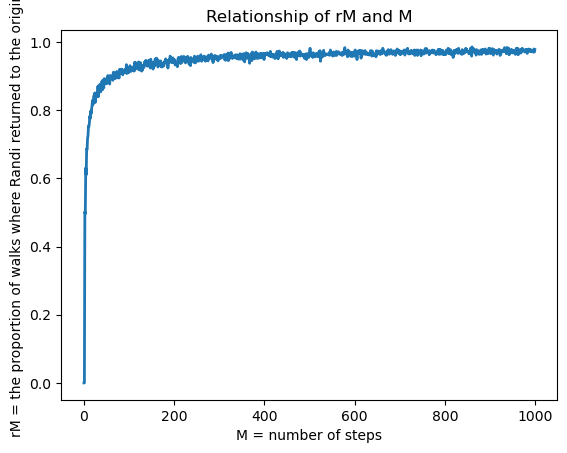

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand
def rand_walk(trials, num_steps):
    random_walk = np.zeros([trials, num_steps])    
    for i in range(trials):
        random_walk[i,:] = np.cumsum(np.random.choice([-1.0, 1.0], size = num_steps, p = [0.5, 0.5]))    
    with_zero = 0
    for l in range(np.shape(random_walk)[0]):
        for m in range(np.shape(random_walk)[1]):
            if random_walk[l][m] == 0:
                with_zero += 1
                break 
    r_M = with_zero / trials
    return r_M


M_list = [i for i in range(0,1000)] 
r_M_list = [rand_walk(1000, i) for i in M_list]
#print(M_list)
#print(r_M_list)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Relationship of rM and M')
ax.set_xlabel('M = number of steps')
ax.set_ylabel('rM = the proportion of walks where Randi returned to the origin')
ax.plot(M_list, r_M_list, linewidth = 2)
plt.show()

This result does support Polya's recurrence theorem--as it demonstrates that the larger the random walk becomes (i.e. the more steps the walk consists of, and the closer the walk is to infinity) the closer the number of random walks in which the walker returns to the origin divided by the total number of random walks gets to 1. So as the number of steps approaches infinity, the ratio of walks that return to the origin expressed as a proportion of the total walks should become 1--i.e. an infinite random walk will return to the origin with probability 1, supporting Polya's recurrence theorem.

__(b)__ (20 points) Imagine Randi is on a grid, at position $(0, 0)$. At each time step, Randi goes, with
equal probability, up, down, left or right (up means $y$ increases by $1$ and right means
$x$ increases by $1$). Simulate $1000$ random walks of length $M = 5000$
in this 2-dimensional grid, and count the number of 2-dimensional random walks of
Randi that end up with him going back to the origin at some point. Then plot $r_M$, defined as part (a), 
as a function of $M$. Don’t fill a giant numpy array with every simulation like you did
in the last homework (uses too much memory; instead, generate random walks one by
one and store only the information you need).

__If you don't implement this problem properly, the execution time for this part can be more than an hour. A proper approach will help you get the result in less than a few minutes. The efficiency of your script will be taken into while grading this part.__

In [10]:
from random import choice
def twod_rand_walk(trials, steps):
    origin_walks = 0
    for i in range(trials):
        flag = 0
        x,y = 0, 0
        x_list, y_list = [], []
        for j in range(steps):
            delta_x, delta_y = choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
            x, y = x + delta_x, y + delta_y
            x_list.append(x)
            y_list.append(y)
            if x == 0 and y == 0 and flag != 1:
                origin_walks += 1
                flag = 1  # ensures walks w a return to origin are not counted more than once  
    r_M2 = origin_walks / trials
    return r_M2
twod_rand_walk(1000, 5000)

0.71

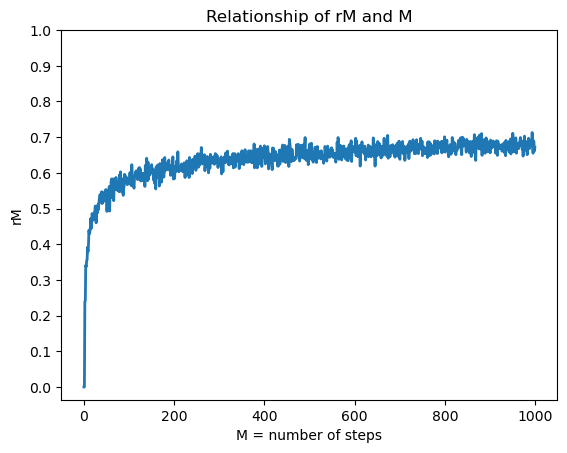

In [14]:
M2_list = [i for i in range(0,1000)] 
r_M2_list = [twod_rand_walk(1000, i) for i in M2_list]
#print(M_list)
#print(r_M_list)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Relationship of rM and M')
ax.set_xlabel('M = number of steps')
ax.set_ylabel('rM')
ax.plot(M2_list, r_M2_list, linewidth = 2)
ax.set_yticks(np.arange(0,1.1,0.1))
plt.show()

---

## When you're finished

- Make sure your notebook runs from top to bottom with no errors. One way to accomplish this is to click on __Kernel &#8594; Restart & Run All__. This will restart Python, and run your notebook from top to bottom.